# Surface animations

Stuart J. Mumford - The University of Sheffield - 2014

This notebook contains code that produces animations of the velocity component on the flux surfaces. It embeds a couple and provides code for generating external movies.

## Obligatory Setup Code

In [1]:
%gui wx
import sys
import os
import glob

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from JSAnimation import IPython_display
import yt.mods as ytm
from mayavi import mlab
from tvtk.api import tvtk

#pysac imports
import pysac.io.yt_fields
import pysac.analysis.tube3D.tvtk_tube_functions as ttf
import pysac.plot.mayavi_plotting_functions as mpf
from pysac.plot.mayavi_seed_streamlines import SeedStreamline
from pysac.plot.helpers import get_mayavi_colourmap

#Import this repos config
sys.path.append("../..")
from scripts.sacconfig import SACConfig
cfg = SACConfig()

ImportError: No module named JSAnimation

In [2]:
#Define tvtk notebook viewer
from IPython.core.display import Image 
def mlab_view(scene, azimuth = 153, elevation = 62, distance = 400, focalpoint = np.array([  25.,   63.,  60.]), aa=16):
    scene.anti_aliasing_frames = aa
    mlab.view(azimuth = azimuth, elevation = elevation, distance = distance, focalpoint = focalpoint)
    scene.save('offscreen.png', size=(500, 500))
    return Image(filename='offscreen.png') 

In [3]:
def mlab_view_arr(scene, azimuth = 153, elevation = 62, distance = 400, focalpoint = np.array([  25.,   63.,  60.]), aa=16):
    scene.anti_aliasing_frames = aa
    mlab.view(azimuth = azimuth, elevation = elevation, distance = distance, focalpoint = focalpoint)
    scene.save('offscreen.png', size=(500, 500))
    im = plt.imread('offscreen.png')
    return im

In [4]:
def glob_files(tube_r, search):
    files = glob.glob(os.path.join(cfg.data_dir,tube_r,search))
    files.sort()
    return files

In [5]:
def get_mpl_title(new_tube):
    scalar_name = new_tube.parent.parent.point_scalars_name
    if scalar_name == 'vperp':
        title = r'$V_{\perp}$'
    elif scalar_name == 'vpar':
        title = r'$V_{\parallel}$'
    elif scalar_name == 'vphi':
        title = r'$V_{\phi}$'
    else:
        title='unknown'
    return title

In [6]:
def make_mlab_animation():
    fig, ax = plt.subplots(1,figsize=(8,8),frameon=False)
    ax.axis('off')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    im = plt.imshow(np.ones([512,512,3]))
    return fig, ax, im

def animate(i, ax, im, div_perp, linesurf, lim, var='vperp'):
    global new_tube
    ds = timeseries[i]
    surf_poly = ttf.read_step(linesurf[i])
    new_tube.parent.parent.remove()
    new_tube, surf_bar, surf_bar_label = mpf.draw_surface(surf_poly,div_perp,lim=lim, position=[0.84, 0.2], position2=[0.11,0.31])
    if var != 'vperp':
        mpf.change_surface_scalars(new_tube,surf_bar_label,var,lim=None,log10=False)
    #Add axes:
    axes, outline = mpf.add_axes(np.array(zip(ds.domain_left_edge,ds.domain_right_edge)).flatten()/1e8)
    ax.set_title(get_mpl_title(new_tube) + ' $t = {:3.2f}$ s'.format(ds.current_time))
    im.set_data(mlab_view_arr(fig2.scene))
    return im,

## Period $p=30$ s Amplitude $A=20\sqrt{2}$ ms$^{-1}$

In [7]:
cfg.period = 30.0
cfg.amp = 'A20r2'

In [8]:
timeseries = ytm.load(os.path.join(cfg.gdf_dir,"*_0*.gdf"))
ds = timeseries[0]

In [9]:
linesurf = glob_files('r60','Fieldline_surface*')

In [10]:
surf_poly = ttf.read_step(linesurf[0])

In [11]:
div_perp = get_mayavi_colourmap([0.,1.,1.], [1.,0.,1.], 0.5 ,256,
                             100, 0, 190)

In [12]:
#if running this creates a persistant window just get it out of the way!
mlab.options.offscreen = True
fig2 = mlab.figure(bgcolor=(1, 1, 1))

fig, ax, im = make_mlab_animation()
new_tube, surf_bar, surf_bar_label = mpf.draw_surface(surf_poly,div_perp,lim=3, position=[0.84, 0.2], position2=[0.11,0.31])
anim.FuncAnimation(fig, animate, frames=range(0,len(linesurf),30), interval=50,fargs=[ax, im, div_perp, linesurf, None, 'vperp'])

## Surface Flux

In [15]:
scalarsurf = glob_files('r60','WaveFlux*')

In [16]:
surf_poly = ttf.read_step(scalarsurf[10])

In [17]:
np.max(surf_poly.point_data.get_array(16))

1057806.7289777184

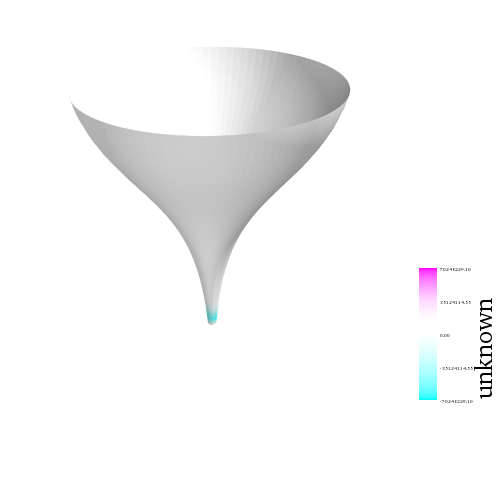

In [21]:
#if running this creates a persistant window just get it out of the way!
mlab.options.offscreen = True
fig2 = mlab.figure(bgcolor=(1, 1, 1))

new_tube, surf_bar, surf_bar_label = mpf.draw_surface(surf_poly,div_perp,lim=3, position=[0.84, 0.2], position2=[0.11,0.31])
vmin, vmax = np.min(surf_poly.point_data.get_array(18)), np.max(surf_poly.point_data.get_array(18))
mpf.change_surface_scalars(new_tube,surf_bar_label,'Fwphi',lim=None,log10=False)
mlab_view(fig2.scene, azimuth = 153, elevation = 62, distance = 400, focalpoint = np.array([  25.,   63.,  60.]), aa=16)